# Quadeer Shaikh M.Tech AI 006

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Image Data Generator

In [4]:
datagen = ImageDataGenerator(
        rescale = 1./255,
        horizontal_flip=True,
        vertical_flip=True)

img_size = 224
batch_size = 32

train_generator = datagen.flow_from_directory(
    '../input/landuse-scene-classification/images_train_test_val/train',  # this is the target directory
    target_size=(img_size, img_size),  # all images will be resized to 300x300
    batch_size=batch_size,
    class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = datagen.flow_from_directory(
    '../input/landuse-scene-classification/images_train_test_val/validation',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')

train_eff = tf.keras.preprocessing.image_dataset_from_directory('../input/landuse-scene-classification/images_train_test_val/train',
                                                                     label_mode = "categorical",
                                                                     image_size = (224,224),
                                                                     batch_size = 32)

val_eff = tf.keras.preprocessing.image_dataset_from_directory('../input/landuse-scene-classification/images_train_test_val/validation',
                                                                   label_mode = "categorical",
                                                                   image_size = (224,224),
                                                                   batch_size = 32)

Found 7350 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.
Found 7350 files belonging to 21 classes.
Found 2100 files belonging to 21 classes.


In [6]:
from tensorflow.keras.applications import DenseNet201, VGG16, VGG19, ResNet50, InceptionV3, DenseNet201, Xception, MobileNetV2, EfficientNetB5
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping

### VGG16

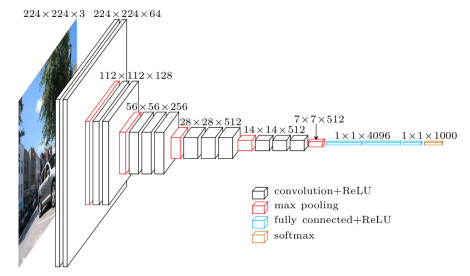

In [30]:
img_size = 224
base_model = VGG16(include_top = False,
                   weights = 'imagenet',
                   input_shape = (img_size,img_size,3))

model = Sequential()

for layer in base_model.layers[:-1]:
    model.add(layer)    

# Freeze the layers 
for layer in model.layers[:-3]:
    layer.trainable = False
    
model.add(GlobalAveragePooling2D())
model.add(Dense(21,'softmax'))

In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [32]:
model.compile(tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [33]:
model_path = "vgg16.h5"
checkpoint = ModelCheckpoint(model_path,
                         monitor="val_loss",
                         mode="min",
                         save_best_only = True,
                         verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                      min_delta = 0, 
                      patience = 5,
                      verbose = 1,
                      restore_best_weights = True)

vgg16_history = model.fit(
                train_generator,
                steps_per_epoch= 7350 // batch_size,
                epochs=25,
                validation_data=validation_generator,
                validation_steps= 2100 // batch_size,
                callbacks=[checkpoint,earlystop])

Epoch 1/25
229/229 [==============================] - 52s 223ms/step - loss: 1.4548 - accuracy: 0.5189 - val_loss: 0.6451 - val_accuracy: 0.7918

Epoch 00001: val_loss improved from inf to 0.64508, saving model to vgg16.h5
Epoch 2/25
229/229 [==============================] - 50s 220ms/step - loss: 0.5186 - accuracy: 0.8187 - val_loss: 0.3447 - val_accuracy: 0.8851

Epoch 00002: val_loss improved from 0.64508 to 0.34470, saving model to vgg16.h5
Epoch 3/25
229/229 [==============================] - 48s 211ms/step - loss: 0.3247 - accuracy: 0.8879 - val_loss: 0.3121 - val_accuracy: 0.8904

Epoch 00003: val_loss improved from 0.34470 to 0.31210, saving model to vgg16.h5
Epoch 4/25
229/229 [==============================] - 48s 212ms/step - loss: 0.2632 - accuracy: 0.9124 - val_loss: 0.2607 - val_accuracy: 0.9082

Epoch 00004: val_loss improved from 0.31210 to 0.26074, saving model to vgg16.h5
Epoch 5/25
229/229 [==============================] - 48s 209ms/step - loss: 0.2061 - accuracy: 

### VGG19

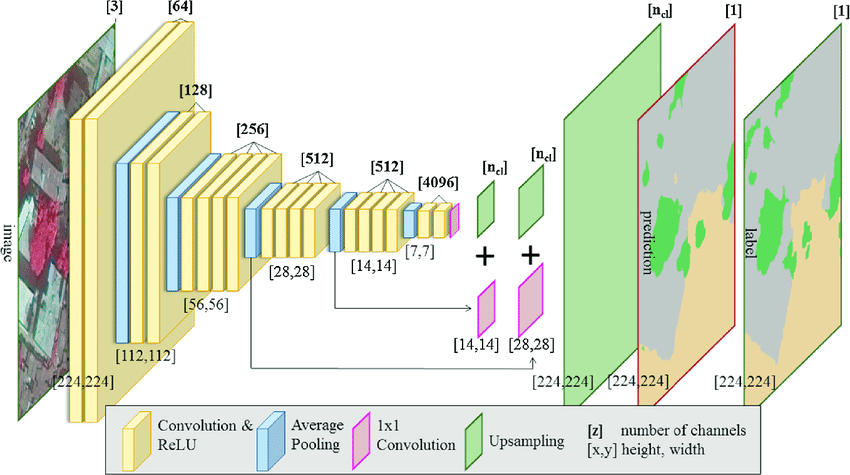

In [38]:
img_size = 224
base_model = VGG19(include_top = False,
                   weights = 'imagenet',
                   input_shape = (img_size,img_size,3))

model = Sequential()

for layer in base_model.layers[:-1]:
    model.add(layer)    

# Freeze the layers 
for layer in model.layers[:-3]:
    layer.trainable = False
    
model.add(GlobalAveragePooling2D())
model.add(Dense(21,'softmax'))

In [39]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [40]:
model.compile(tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [41]:
model_path = "vgg19.h5"
checkpoint = ModelCheckpoint(model_path,
                         monitor="val_loss",
                         mode="min",
                         save_best_only = True,
                         verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                      min_delta = 0, 
                      patience = 5,
                      verbose = 1,
                      restore_best_weights = True)

vgg19_history = model.fit(
                train_generator,
                steps_per_epoch= 7350 // batch_size,
                epochs=25,
                validation_data=validation_generator,
                validation_steps= 2100 // batch_size,
                callbacks=[checkpoint,earlystop])

Epoch 1/25
229/229 [==============================] - 49s 212ms/step - loss: 1.2516 - accuracy: 0.5851 - val_loss: 0.8115 - val_accuracy: 0.7394

Epoch 00001: val_loss improved from inf to 0.81150, saving model to vgg19.h5
Epoch 2/25
229/229 [==============================] - 49s 212ms/step - loss: 0.6336 - accuracy: 0.7998 - val_loss: 0.4441 - val_accuracy: 0.8553

Epoch 00002: val_loss improved from 0.81150 to 0.44412, saving model to vgg19.h5
Epoch 3/25
229/229 [==============================] - 49s 215ms/step - loss: 0.4347 - accuracy: 0.8564 - val_loss: 0.3548 - val_accuracy: 0.8798

Epoch 00003: val_loss improved from 0.44412 to 0.35476, saving model to vgg19.h5
Epoch 4/25
229/229 [==============================] - 48s 211ms/step - loss: 0.3377 - accuracy: 0.8858 - val_loss: 0.4998 - val_accuracy: 0.8380

Epoch 00004: val_loss did not improve from 0.35476
Epoch 5/25
229/229 [==============================] - 49s 212ms/step - loss: 0.2942 - accuracy: 0.9052 - val_loss: 0.3034 - va

### ResNet50

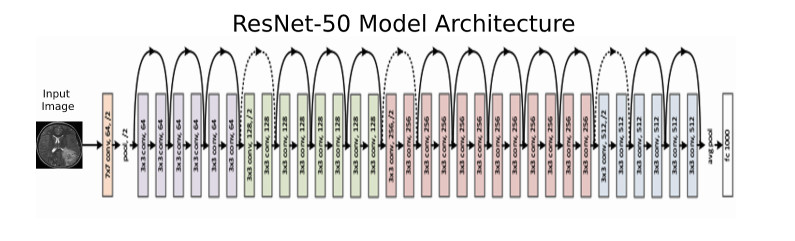

In [23]:
img_size = 224
base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (img_size,img_size,3))

output = base_model.layers[-1].output
resnet = Model(inputs=base_model.input, outputs=output)

for layer in resnet.layers[:]:
    layer.trainable = False

model = Sequential()
    
model.add(resnet)
model.add(GlobalAveragePooling2D())
model.add(Dense(21,'softmax'))

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_3 (Functional)         (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 21)                43029     
Total params: 23,630,741
Trainable params: 43,029
Non-trainable params: 23,587,712
_________________________________________________________________


In [25]:
model.compile(tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [26]:
model_path = "resnet50.h5"
checkpoint = ModelCheckpoint(model_path,
                         monitor="val_loss",
                         mode="min",
                         save_best_only = True,
                         verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                      min_delta = 0, 
                      patience = 5,
                      verbose = 1,
                      restore_best_weights = True)

resnet_history = model.fit(
                train_eff,
                steps_per_epoch= 7350 // batch_size,
                epochs=25,
                validation_data=val_eff,
                validation_steps= 2100 // batch_size,
                callbacks=[checkpoint,earlystop])

Epoch 1/25
229/229 [==============================] - 34s 132ms/step - loss: 0.6951 - accuracy: 0.8110 - val_loss: 0.3147 - val_accuracy: 0.9183

Epoch 00001: val_loss improved from inf to 0.31469, saving model to resnet50.h5
Epoch 2/25
229/229 [==============================] - 7s 29ms/step - loss: 0.3149 - accuracy: 0.9091 - val_loss: 0.3150 - val_accuracy: 0.9163

Epoch 00002: val_loss did not improve from 0.31469


### InceptionV3

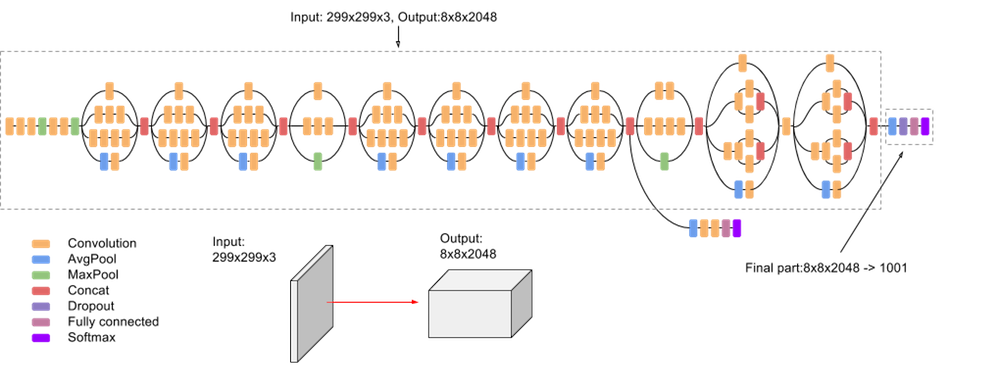

In [42]:
img_size = 224
base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (img_size,img_size,3))

output = base_model.layers[-1].output
inceptionv3 = Model(inputs=base_model.input, outputs=output)

for layer in inceptionv3.layers[:-12]:
    layer.trainable = False

model = Sequential()
    
model.add(inceptionv3)
model.add(GlobalAveragePooling2D())
model.add(Dense(21,'softmax'))
model.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_5 (Functional)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_9 ( (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 21)                43029     
Total params: 21,845,813
Trainable params: 436,757
Non-trainable params: 21,409,056
_________________________________________________________________


In [43]:
model.compile(tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [44]:
model_path = "inceptionv3.h5"
checkpoint = ModelCheckpoint(model_path,
                         monitor="val_loss",
                         mode="min",
                         save_best_only = True,
                         verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                      min_delta = 0, 
                      patience = 5,
                      verbose = 1,
                      restore_best_weights = True)

inception_history = model.fit(
                train_generator,
                steps_per_epoch= 7350 // batch_size,
                epochs=25,
                validation_data=validation_generator,
                validation_steps= 2100 // batch_size,
                callbacks=[checkpoint,earlystop])

Epoch 1/25
229/229 [==============================] - 75s 215ms/step - loss: 0.5758 - accuracy: 0.8386 - val_loss: 0.2436 - val_accuracy: 0.9274

Epoch 00001: val_loss improved from inf to 0.24358, saving model to inceptionv3.h5
Epoch 2/25
229/229 [==============================] - 50s 216ms/step - loss: 0.1754 - accuracy: 0.9489 - val_loss: 0.1911 - val_accuracy: 0.9370

Epoch 00002: val_loss improved from 0.24358 to 0.19109, saving model to inceptionv3.h5
Epoch 3/25
229/229 [==============================] - 49s 216ms/step - loss: 0.1182 - accuracy: 0.9671 - val_loss: 0.1771 - val_accuracy: 0.9428

Epoch 00003: val_loss improved from 0.19109 to 0.17707, saving model to inceptionv3.h5
Epoch 4/25
229/229 [==============================] - 48s 209ms/step - loss: 0.0810 - accuracy: 0.9773 - val_loss: 0.1406 - val_accuracy: 0.9558

Epoch 00004: val_loss improved from 0.17707 to 0.14058, saving model to inceptionv3.h5
Epoch 5/25
229/229 [==============================] - 48s 207ms/step - l

### DenseNet201

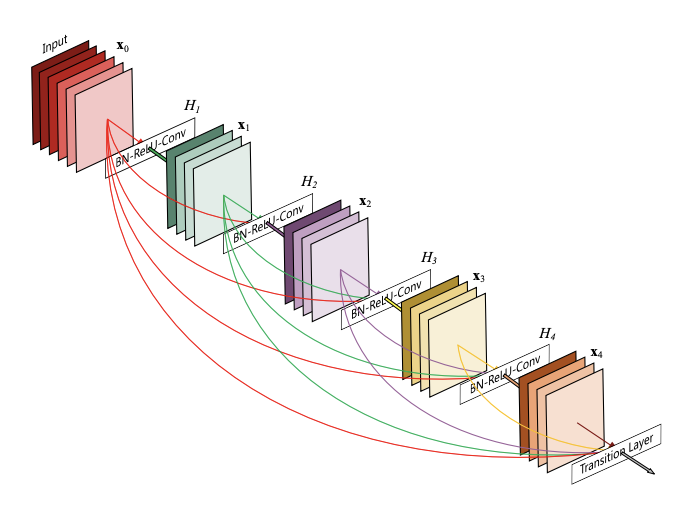

In [45]:
img_size = 224
base_model = DenseNet201(include_top = False,
                         weights = 'imagenet',
                         input_shape = (img_size,img_size,3))

output = base_model.layers[-1].output
densenet201 = Model(inputs=base_model.input, outputs=output)

for layer in densenet201.layers[:-9]:
    layer.trainable = False

model = Sequential()
    
model.add(densenet201)
model.add(GlobalAveragePooling2D())
model.add(Dense(21,'softmax'))
model.summary()

74850304/74836368 [==============================] - 0s 0us/step
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_6 (Functional)         (None, 7, 7, 1920)        18321984  
_________________________________________________________________
global_average_pooling2d_10  (None, 1920)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 21)                40341     
Total params: 18,362,325
Trainable params: 326,741
Non-trainable params: 18,035,584
_________________________________________________________________


In [46]:
model.compile(tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [47]:
model_path = "densenet201.h5"
checkpoint = ModelCheckpoint(model_path,
                         monitor="val_loss",
                         mode="min",
                         save_best_only = True,
                         verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                      min_delta = 0, 
                      patience = 5,
                      verbose = 1,
                      restore_best_weights = True)

densenet_history = model.fit(
                train_generator,
                steps_per_epoch= 7350 // batch_size,
                epochs=25,
                validation_data=validation_generator,
                validation_steps= 2100 // batch_size,
                callbacks=[checkpoint,earlystop])

Epoch 1/25
229/229 [==============================] - 63s 235ms/step - loss: 0.7491 - accuracy: 0.8148 - val_loss: 0.2300 - val_accuracy: 0.9466

Epoch 00001: val_loss improved from inf to 0.22997, saving model to densenet201.h5
Epoch 2/25
229/229 [==============================] - 51s 225ms/step - loss: 0.1554 - accuracy: 0.9656 - val_loss: 0.1266 - val_accuracy: 0.9663

Epoch 00002: val_loss improved from 0.22997 to 0.12660, saving model to densenet201.h5
Epoch 3/25
229/229 [==============================] - 51s 221ms/step - loss: 0.0888 - accuracy: 0.9825 - val_loss: 0.0724 - val_accuracy: 0.9808

Epoch 00003: val_loss improved from 0.12660 to 0.07239, saving model to densenet201.h5
Epoch 4/25
229/229 [==============================] - 51s 221ms/step - loss: 0.0518 - accuracy: 0.9895 - val_loss: 0.0510 - val_accuracy: 0.9851

Epoch 00004: val_loss improved from 0.07239 to 0.05099, saving model to densenet201.h5
Epoch 5/25
229/229 [==============================] - 51s 221ms/step - l

### Xception

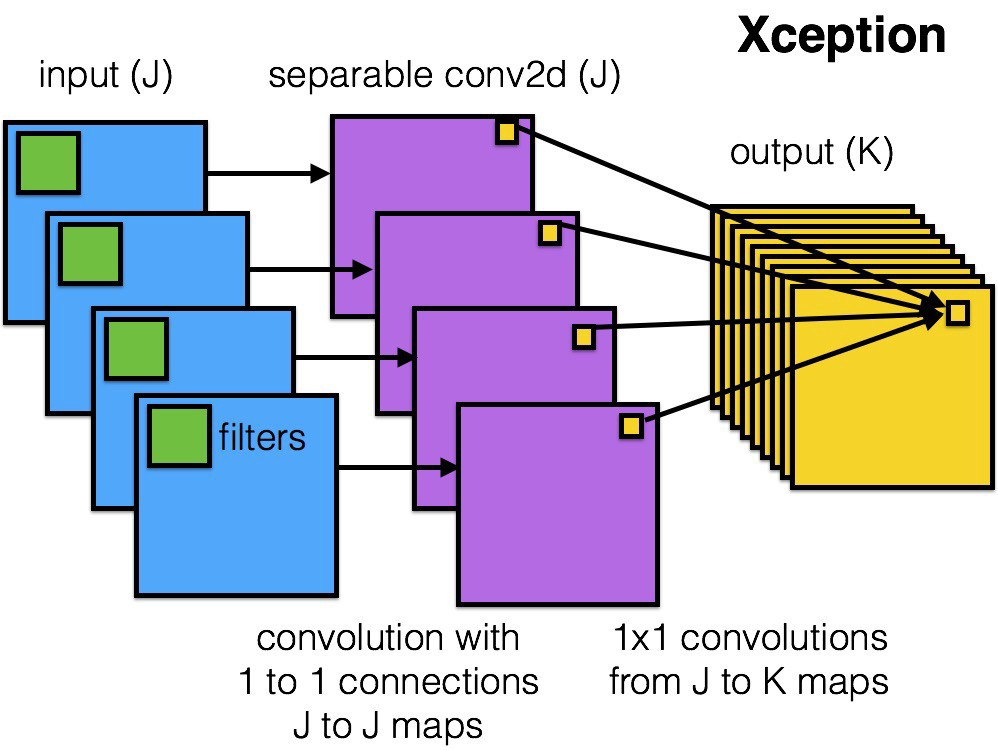

In [48]:
img_size = 224
base_model = Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(img_size, img_size, 3),
    include_top=False,
)  # Do not inc

output = base_model.layers[-1].output
xception = Model(inputs=base_model.input, outputs=output)

for layer in xception.layers[:-6]:
    layer.trainable = False

model = Sequential()
    
model.add(xception)
model.add(GlobalAveragePooling2D())
model.add(Dense(21,'softmax'))
model.summary()

83697664/83683744 [==============================] - 0s 0us/step
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_7 (Functional)         (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_11  (None, 2048)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 21)                43029     
Total params: 20,904,509
Trainable params: 4,791,829
Non-trainable params: 16,112,680
_________________________________________________________________


In [49]:
model.compile(tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [50]:
model_path = "xception.h5"
checkpoint = ModelCheckpoint(model_path,
                         monitor="val_loss",
                         mode="min",
                         save_best_only = True,
                         verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                      min_delta = 0, 
                      patience = 5,
                      verbose = 1,
                      restore_best_weights = True)

xception_history = model.fit(
                train_generator,
                steps_per_epoch= 7350 // batch_size,
                epochs=25,
                validation_data=validation_generator,
                validation_steps= 2100 // batch_size,
                callbacks=[checkpoint,earlystop])

Epoch 1/25
229/229 [==============================] - 53s 220ms/step - loss: 0.3805 - accuracy: 0.8863 - val_loss: 0.1709 - val_accuracy: 0.9389

Epoch 00001: val_loss improved from inf to 0.17091, saving model to xception.h5
Epoch 2/25
229/229 [==============================] - 50s 217ms/step - loss: 0.1330 - accuracy: 0.9583 - val_loss: 0.2346 - val_accuracy: 0.9385

Epoch 00002: val_loss did not improve from 0.17091
Epoch 3/25
229/229 [==============================] - 49s 212ms/step - loss: 0.0824 - accuracy: 0.9712 - val_loss: 0.1127 - val_accuracy: 0.9630

Epoch 00003: val_loss improved from 0.17091 to 0.11271, saving model to xception.h5
Epoch 4/25
229/229 [==============================] - 50s 217ms/step - loss: 0.0575 - accuracy: 0.9795 - val_loss: 0.1209 - val_accuracy: 0.9591

Epoch 00004: val_loss did not improve from 0.11271
Epoch 5/25
229/229 [==============================] - 49s 212ms/step - loss: 0.0576 - accuracy: 0.9814 - val_loss: 0.1131 - val_accuracy: 0.9611

Epoc

### MobileNetV2

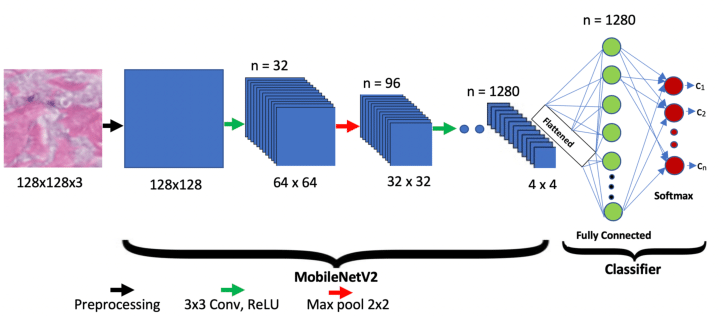

In [51]:
img_size = 224
base_model = MobileNetV2(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(img_size, img_size, 3),
    include_top=False,
)  # Do not inc

output = base_model.layers[-1].output
mobilenet = Model(inputs=base_model.input, outputs=output)

for layer in mobilenet.layers[:-11]:
    layer.trainable = False

model = Sequential()
    
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Dense(21,'softmax'))
model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_8 (Functional)         (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_12  (None, 1280)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 21)                26901     
Total params: 2,284,885
Trainable params: 912,981
Non-trainable params: 1,371,904
_________________________________________________________________


In [52]:
model.compile(tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [53]:
model_path = "mobilenet.h5"
checkpoint = ModelCheckpoint(model_path,
                         monitor="val_loss",
                         mode="min",
                         save_best_only = True,
                         verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                      min_delta = 0, 
                      patience = 5,
                      verbose = 1,
                      restore_best_weights = True)

mobilenet_history = model.fit(
                train_generator,
                steps_per_epoch= 7350 // batch_size,
                epochs=25,
                validation_data=validation_generator,
                validation_steps= 2100 // batch_size,
                callbacks=[checkpoint,earlystop])

Epoch 1/25
229/229 [==============================] - 49s 205ms/step - loss: 0.4700 - accuracy: 0.8568 - val_loss: 8.5995 - val_accuracy: 0.3346

Epoch 00001: val_loss improved from inf to 8.59953, saving model to mobilenet.h5
Epoch 2/25
229/229 [==============================] - 46s 200ms/step - loss: 0.2043 - accuracy: 0.9365 - val_loss: 4.0140 - val_accuracy: 0.6091

Epoch 00002: val_loss improved from 8.59953 to 4.01398, saving model to mobilenet.h5
Epoch 3/25
229/229 [==============================] - 46s 201ms/step - loss: 0.1392 - accuracy: 0.9531 - val_loss: 4.7550 - val_accuracy: 0.6327

Epoch 00003: val_loss did not improve from 4.01398
Epoch 4/25
229/229 [==============================] - 46s 200ms/step - loss: 0.0984 - accuracy: 0.9668 - val_loss: 1.5101 - val_accuracy: 0.8236

Epoch 00004: val_loss improved from 4.01398 to 1.51008, saving model to mobilenet.h5
Epoch 5/25
229/229 [==============================] - 46s 201ms/step - loss: 0.1006 - accuracy: 0.9683 - val_loss:

### EfficientNetB5

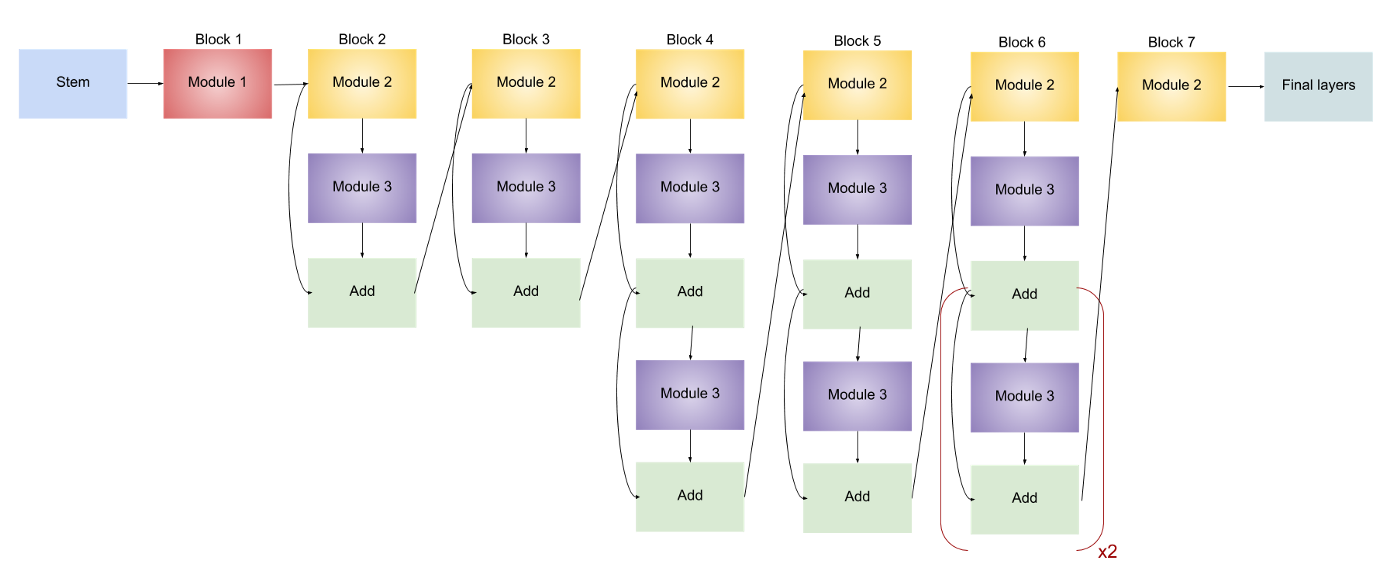

In [27]:
img_size = 224
base_model = EfficientNetB5(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(img_size, img_size, 3),
    include_top=False,
)  # Do not inc

base_model.trainable = False
inputs = tf.keras.Input(shape=(224,224,3))

x = base_model(inputs)

x = GlobalAveragePooling2D()(x)

outputs = Dense(21, activation="softmax")(x)

model = Model(inputs, outputs)
model.summary()

115277824/115263384 [==============================] - 1s 0us/step
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb5 (Functional)  (None, 7, 7, 2048)        28513527  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 21)                43029     
Total params: 28,556,556
Trainable params: 43,029
Non-trainable params: 28,513,527
_________________________________________________________________


In [28]:
model.compile(tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [29]:
model_path = "effnet.h5"
checkpoint = ModelCheckpoint(model_path,
                         monitor="val_loss",
                         mode="min",
                         save_best_only = True,
                         verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                      min_delta = 0, 
                      patience = 5,
                      verbose = 1,
                      restore_best_weights = True)

effnet_history = model.fit(
                train_eff,
                steps_per_epoch = len(train_eff),
                epochs=25,
                validation_data=val_eff,
                validation_steps= len(val_eff),
                callbacks=[checkpoint,earlystop])

Epoch 1/25
230/230 [==============================] - 55s 191ms/step - loss: 0.8619 - accuracy: 0.8159 - val_loss: 0.3771 - val_accuracy: 0.9190

Epoch 00001: val_loss improved from inf to 0.37713, saving model to effnet.h5
Epoch 2/25
230/230 [==============================] - 41s 175ms/step - loss: 0.2901 - accuracy: 0.9337 - val_loss: 0.2531 - val_accuracy: 0.9400

Epoch 00002: val_loss improved from 0.37713 to 0.25306, saving model to effnet.h5
Epoch 3/25
230/230 [==============================] - 42s 178ms/step - loss: 0.1975 - accuracy: 0.9540 - val_loss: 0.2006 - val_accuracy: 0.9481

Epoch 00003: val_loss improved from 0.25306 to 0.20060, saving model to effnet.h5
Epoch 4/25
230/230 [==============================] - 41s 177ms/step - loss: 0.1552 - accuracy: 0.9656 - val_loss: 0.1703 - val_accuracy: 0.9557

Epoch 00004: val_loss improved from 0.20060 to 0.17032, saving model to effnet.h5
Epoch 5/25
230/230 [==============================] - 41s 176ms/step - loss: 0.1250 - accura

In [55]:
output_dir = './'
models = os.listdir(output_dir)

In [56]:
models

['densenet201.h5',
 'vgg19.h5',
 '__notebook_source__.ipynb',
 'resnet50.h5',
 'mobilenet.h5',
 'effnet.h5',
 'xception.h5',
 'inceptionv3.h5',
 'vgg16.h5']

In [57]:
models.pop(2)

'__notebook_source__.ipynb'

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

In [64]:
datagen = ImageDataGenerator(
        rescale = 1./255)
test_generator = datagen.flow_from_directory('../input/landuse-scene-classification/images_train_test_val/test',
    target_size=(img_size, img_size),
    batch_size=batch_size,              
    class_mode='categorical',
    shuffle=False)

test_eff = tf.keras.preprocessing.image_dataset_from_directory('../input/landuse-scene-classification/images_train_test_val/test',
                                                               label_mode = "categorical",
                                                               image_size = (224,224),
                                                               batch_size = 32)

Found 1050 images belonging to 21 classes.
Found 1050 files belonging to 21 classes.


In [65]:
target_names = []

for key in train_generator.class_indices:
    target_names.append(key)

acc_scores = []
f1_scores = []

for m in models:
    model = tf.keras.models.load_model(os.path.join(output_dir,m))
    Y_pred = model.predict(test_generator)
    if 'resnet50.h5' in m or 'effnet.h5' in m:
        Y_pred = model.predict(test_eff)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = test_generator.classes
        
    acc_scores.append(accuracy_score(y_true,y_pred))
    f1_scores.append(f1_score(y_true,y_pred,average='macro'))
    print(f"\rModel: {m}",end='')

Model: vgg16.h5nv3.h5

In [66]:
import pandas as pd 

In [67]:
data = pd.DataFrame()
data['Models'] = models
data['Accuracy'] = acc_scores
data['F1_score'] = f1_scores

### Benchmarking
- Effnet and Resnet have some issues with the image generator, a different generator needs to be used to check their test accuracy. Validation results for the respective models have already been displayed.

In [68]:
data

,Models,Accuracy,F1_score
0,densenet201.h5,0.976190,0.976235
1,vgg19.h5,0.939048,0.937461
2,resnet50.h5,0.043810,0.043612
3,mobilenet.h5,0.959048,0.959350
4,effnet.h5,0.050476,0.050134
5,xception.h5,0.961905,0.962224
6,inceptionv3.h5,0.950476,0.950602
7,vgg16.h5,0.961905,0.961421


In [72]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [73]:
sns.set_theme(style='darkgrid')

### Model Accuracies and Epochs by which they converged

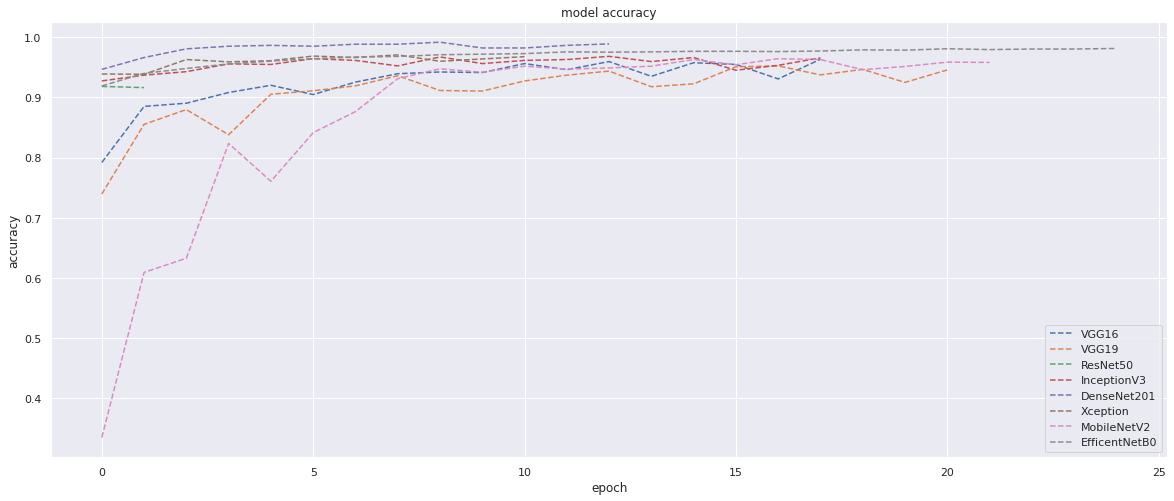

In [74]:
plt.figure(figsize=(20,8))
plt.plot(vgg16_history.history['val_accuracy'],label='VGG16',ls = '--')
plt.plot(vgg19_history.history['val_accuracy'],label='VGG19',ls = '--')
plt.plot(resnet_history.history['val_accuracy'],label='ResNet50',ls = '--')
plt.plot(inception_history.history['val_accuracy'],label='InceptionV3',ls = '--')
plt.plot(densenet_history.history['val_accuracy'],label='DenseNet201',ls = '--')
plt.plot(xception_history.history['val_accuracy'],label='Xception',ls = '--')
plt.plot(mobilenet_history.history['val_accuracy'],label='MobileNetV2',ls = '--')
plt.plot(effnet_history.history['val_accuracy'],label='EfficentNetB0',ls = '--')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()